In [1]:
import pandas as pd 

data = pd.read_csv("Tweets.csv")
print(data)

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral

In [2]:
count_nan_key=data.isna().sum()
print(count_nan_key)
print()
print("There is : " + str((count_nan_key.sum()/data.size)*100) + " % of missing values in the train set")

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

There is : 0.0018194388850478512 % of missing values in the train set


In [3]:
data['text'].fillna(' ', inplace=True)
data['selected_text'].fillna(' ', inplace=True)
print(data.isna().sum())

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


In [4]:
data = data.drop_duplicates()
print(data)

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral

In [5]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y=data["sentiment"]
X=data["selected_text"]

# Clean the text
def preprocess_text(text):
    processed_text = text.lower()
    processed_text = re.sub(r'[^\w\s]', '', processed_text)
    return processed_text

# Set up X
X=X.apply(preprocess_text)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences)

# Set up y
le=LabelEncoder()
y=le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[    0     0     0 ...     0     0   116]
 [    0     0     0 ...     0     0    65]
 [    0     0     0 ...    93    25  1235]
 ...
 [    0     0     0 ...    92    11    14]
 [    0     0     0 ...    11   121  2312]
 [    0     0     0 ...   960 14591   171]]

[[    0     0     0 ... 15279  3894  1923]
 [    0     0     0 ...  5335   132   135]
 [    0     0     0 ...   548   389  2193]
 ...
 [    0     0     0 ...    32     9   246]
 [    0     0     0 ...   335    33    25]
 [    0     0     0 ...     0     0   153]]

[2 2 2 ... 2 1 1]

[1 0 2 ... 2 1 0]


<Axes: ylabel='Count'>

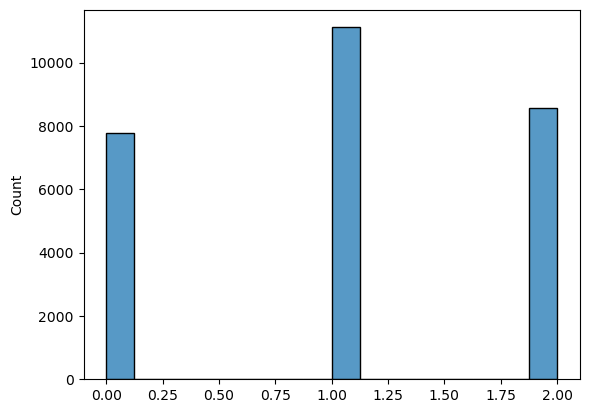

In [6]:
import seaborn as sns
sns.histplot(x=y)
# 0 : negative , 1 : neutral , 2 : positive

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=X.shape[1]))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Convert in numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

model.fit(X_train, y_train,epochs=50, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/50
440/440 [==============================] - 14s 26ms/step - loss: 1.0541 - accuracy: 0.4559 - val_loss: 0.9819 - val_accuracy: 0.5769
Epoch 2/50
440/440 [==============================] - 10s 23ms/step - loss: 0.8897 - accuracy: 0.5849 - val_loss: 0.8559 - val_accuracy: 0.5676
Epoch 3/50
440/440 [==============================] - 10s 24ms/step - loss: 0.8501 - accuracy: 0.5862 - val_loss: 0.8461 - val_accuracy: 0.5763
Epoch 4/50
440/440 [==============================] - 10s 23ms/step - loss: 0.8442 - accuracy: 0.5890 - val_loss: 0.8407 - val_accuracy: 0.5767
Epoch 5/50
440/440 [==============================] - 10s 23ms/step - loss: 0.8407 - accuracy: 0.5896 - val_loss: 0.8383 - val_accuracy: 0.5767
Epoch 6/50
440/440 [==============================] - 11s 24ms/step - loss: 0.8384 - accuracy: 0.5910 - val_loss: 0.8354 - val_accuracy: 0.5774
Epoch 7/50
440/440 [==============================] - 11s 25ms/step - loss: 0.8369 - accuracy: 0.5892 - val_loss: 0.8334 - val_accuracy:

In [8]:
test_loss , test_accuracy = model . evaluate ( X_test , y_test )
print (" Test Accuracy : ", test_accuracy )
print (" Test Loss : ", test_loss )

172/172 [==============================] - 1s 6ms/step - loss: 0.5312 - accuracy: 0.7993
 Test Accuracy :  0.799345076084137
 Test Loss :  0.5312440395355225


In [9]:
import numpy as np

def sentiment_decode(sentiment):
    if sentiment == 0:
        return 'negative'
    elif sentiment == 1:
        return 'neutral'
    else:
        return 'positive'

n = 5
random_test_indexes = np.random.choice(X_test.shape[0], size=n, replace=False)
random_test_samples = X_test[random_test_indexes]
random_test_labels = y_test[random_test_indexes]

y_pred = model.predict(random_test_samples).argmax(axis=1)

for i, tweet in enumerate(random_test_samples):
    print("Tweet: ", tweet)
    print("True Sentiment: ", sentiment_decode(random_test_labels[i]))
    print("Predicted Sentiment: ", sentiment_decode(y_pred[i]))
    print()

1/1 [==============================] - 1s 901ms/step
Tweet:  [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0   176  2397   836 11076  1485]
True Sentiment:  positive
Predicted Sentiment:  neutral

Tweet:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   1  43 352 712   9 308 133]
True Sentiment:  neutral
Predicted Sentiment:  neutral

Tweet:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 62]
True Sentiment:  positive
Predicted Sentiment:  positive

Tweet:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1 29]
True Sentiment:  positive
Predicted Sentiment:  positive

Tweet:  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 1060  126   11  394   13  189    7 1335    9   54   34 

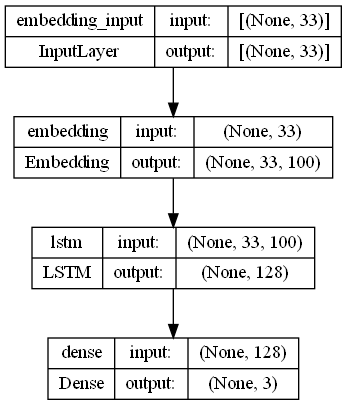

In [10]:
import pydot
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
hidden_layers = sum([1 for layer in model.layers if isinstance(layer, LSTM)])
print("Nombre de couches cachées : ", hidden_layers)
num_layers = len(model.layers)
print("Nombre de couches dans le modèle : ", num_layers)

Nombre de couches cachées :  1
Nombre de couches dans le modèle :  3
